In [1]:
include("../cliff5.jl")
using PyPlot
using LaTeXStrings
using Profile

In [4]:
function bw_mbl_update!(state)
    n = size(state, 1)
    for i in 1:2:n
        cl = random_2mbl_gate()
        cliff2_action(cl, state, i, i%n+1)
    end
    for i in 2:2:n
        cl = random_2mbl_gate()
        cliff2_action(cl, state, i, i%n+1)
    end
end

bw_mbl_update! (generic function with 1 method)

In [11]:
n = 64
n_step = 100
step_size = 1
n_average = 100

result = zeros(n_step)
cut = div(n, 2)

for _ in 1:n_average
    state = all_plus(n)
    for t in 1:n_step
        result[t] += pure_state_bipartite_entropy(state, 1:cut)
        bw_mbl_update!(state)
    end
end

result ./= n_average

100-element Array{Float64,1}:
 0.0
 0.93
 1.0
 1.12
 1.08
 0.95
 1.04
 0.94
 1.06
 1.12
 0.88
 0.93
 1.01
 ⋮
 1.03
 0.98
 1.01
 1.04
 0.95
 1.04
 0.93
 0.94
 1.04
 1.03
 1.01
 0.91

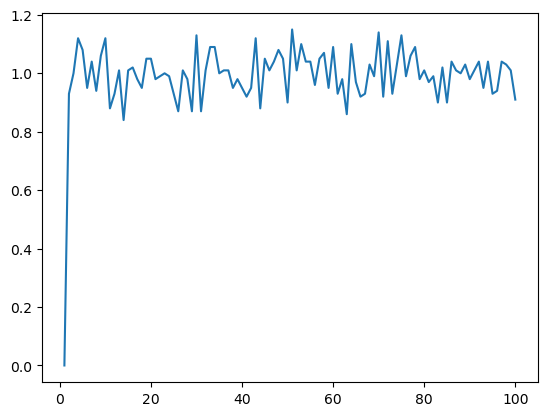

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000025F56A0>

In [13]:
x = 1:n_step
y = result

plot(x, y)

In [17]:
n = 8
state = all_plus(n)
for _ in 1:10000
    bw_mbl_update!(state)
end
print(state)

Paulis[X II II II II II II Z; II X Z II II II II II; II Z X Z II II II II; II II Z Y II II II II; II II II II X Z II II; II II II II Z X Z II; II II II II II Z Y Z; Z II II II II II Z X]